# <p style="text-align: center;">Long Short Term Memory (LSTM)<br>for time series prediction
</p>
<p style="text-align: center;">here: number of passengers</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

## Table of contents

1. Get the dataset
2. Load the dataset
3. Plot the time series
4. Normalize the raw data
5. Split data into training and test data
6. Prepare sequence-to-sequence training/test data
7. Prepare input to be fed into LSTM
8. Build and train a first LSTM model
9. Use the trained LSTM to predict values
10. Plot the prediction results
11. Putting all code for experiments together

## 1. Get the dataset

For training a LSTM model for time series prediction, we need a dataset.

This notebook here is stronlgy inspired by [Jason Brownlee's LSTM blog](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ "Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras"). In this blog a real dataset is used that [can be downloaded from the DataMarket website](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line "International airline passengers dataset") and contains the number of international airline passengers on a monthly basis (specified in thousands) from Jan 1949 to December 1960.

However, it seems that his website is outdated since DataMarket was acquired by a company called Qlik.

For this it is good to see that the dataset [can now also available be downloaded from Kaggle](https://www.kaggle.com/andreazzini/international-airline-passengers) as a simple .csv file with 144 data rows.

Note:
 - you should remove the last line from the .csv file which contains some explanatory text.
 - for the sake of simplicity when accessing data columns: rename the 2nd column of the dataset to "Passengers"

## 2. Load the dataset

We can load in the dataset easily using Pandas.

In [1]:
import pandas as pd
filename = "passengers_dataset/international-airline-passengers.csv"
table = pd.read_csv( filename )

In [2]:
table

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


## 3. Plot the time series

We can use MatplobLib for dislaying the time series as a graph.

table has type <class 'pandas.core.frame.DataFrame'>
time_series has type <class 'numpy.ndarray'>


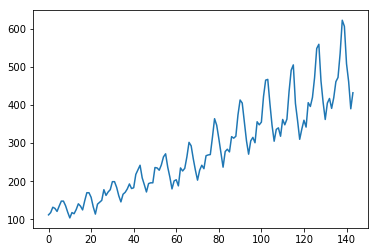

In [3]:
import matplotlib.pyplot as plt

print("table has type", type(table))
time_series_raw = table["Passengers"].values
print("time_series has type", type(time_series_raw))

plt.plot(time_series_raw)
plt.show()

## 4. Normalize the raw data

For Neural Networks it is always good, if the input data is scaled. This makes it easier for the network to find suitable weights.

We can use [Scikit-learn's MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to do this job.



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
time_series_scaled_as_matrix = scaler.fit_transform( time_series_raw.reshape(-1,1) )
time_series_scaled = time_series_scaled_as_matrix.reshape(-1)

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\env_mss\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
time_series_scaled

array([0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
       0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
       0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
       0.05984556, 0.04054054, 0.08687259, 0.12741313, 0.12741313,
       0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467

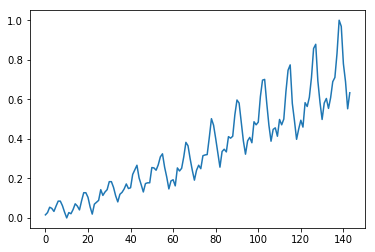

In [6]:
plt.plot(time_series_scaled)
plt.show()

## 5. Split data into training and test data

There is only one time series. So what is the training and what is the test data?

The solution is: we can use some part of the time series for the training data and some part for the test data.

In [7]:
ratio_of_data_to_use_for_training = 0.67
len_dataset = len(time_series_scaled)
train_size = int(len_dataset * ratio_of_data_to_use_for_training)
test_size = len_dataset - train_size

train_series = time_series_scaled[0:train_size]
test_series  = time_series_scaled[train_size:]

print("train_series has length", len(train_series))
print("test_series has length", len(test_series))

train_series has length 96
test_series has length 48


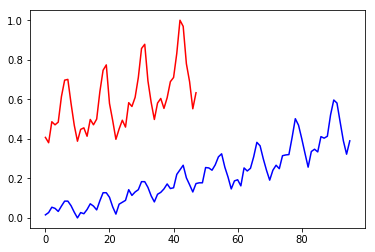

In [8]:
plt.plot(train_series, 'b')
plt.plot(test_series, 'r')
plt.show()

## 6. Prepare sequence-to-sequence training/test data

We have split the time series into a training and a test time series.

However, for training the LSTM we need to prepare the training data for example as following if we want to predict for a sequence of 3 values the next time series value:

    [value_t-2, value_t-1, value_t  ] --> value_t+1
    [value_t-1, value_t  , value_t+1] --> value_t+2
    [value_t  , value_t+1, value_t+2] --> value_t+3
    ...
    etc.

So in general for a sequence-to-sequence prediction task we need to prepare the input for the LSTM to have the form:

n = nr_inputs, m=nr_outputs

    [value_0, value_1, ..., value_n-1] -> [value_n+0, ..., value_n+m-1]
    [value_1, value_2, ..., value_n  ] -> [value_n+1, ..., value_n+1+m-1]
    etc.


In [9]:
import numpy as np

def to_sequence_data(dataset, n=1, m=1):
    dataX, dataY = [], []
    for i in range( len(dataset)-n-1 ):
        a = dataset[ i : i+n ]
        dataX.append( a )
        dataY.append( dataset[ i+n : i+n+m ] )
    return np.array(dataX), np.array(dataY)

In [10]:
nr_inp_time_steps=3
nr_out_time_steps=1
trainX, trainY = to_sequence_data(train_series,
                                  nr_inp_time_steps,
                                  nr_out_time_steps)
testX, testY = to_sequence_data(test_series,
                                nr_inp_time_steps,
                                nr_out_time_steps)

In [11]:
print(trainX[0], "-->", trainY[0])
print(trainX[1], "-->", trainY[1])
print(trainX[2], "-->", trainY[2])

[0.01544402 0.02702703 0.05405405] --> [0.04826255]
[0.02702703 0.05405405 0.04826255] --> [0.03281853]
[0.05405405 0.04826255 0.03281853] --> [0.05984556]


## 7. Prepare input to be fed into LSTM

Preparing the input to a LSTM can be a little bit tricky!

However, Jason Brownlee has a blog which provides a
gentle introduction into the topic:

"The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

    - Samples. One sequence is one sample. A batch is comprised of one or more samples.
    - Time Steps. One time step is one point of observation in the sample.
    - Features. One feature is one observation at a time step.
    
When defining the input layer of your LSTM network,
the network assumes you have 1 or more samples and
requires that you specify the number of time steps and
the number of features. You can do this by specifying
a tuple to the “input_shape” argument.

For example, the model below defines an input layer
that expects 1 or more samples, 50 time steps, and 2 features.

    model = Sequential()
    model.add(LSTM(32, input_shape=(50, 2)))
    model.add(Dense(1))"

Quotation source:
https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

Currently trainX has the following shape:

In [12]:
print("trainX shape is", trainX.shape)
print("trainY shape is", trainY.shape)

print("testX.shape is", testX.shape)
print("testY shape is", testY.shape)

trainX shape is (92, 3)
trainY shape is (92, 1)
testX.shape is (44, 3)
testY shape is (44, 1)


In [13]:
# reshape input to be [samples, time steps, features]
#
# this is the shape of the input that is needed for
# the Keras LSTM as input!

trainX = np.reshape(trainX,(trainX.shape[0], nr_inp_time_steps, 1))
testX  = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))

In [14]:
print("trainX shape is", trainX.shape)
print("trainY shape is", trainY.shape)

print("testX.shape is", testX.shape)
print("testY shape is", testY.shape)

trainX shape is (92, 3, 1)
trainY shape is (92, 1)
testX.shape is (44, 3, 1)
testY shape is (44, 1)


## 8. Build and train a first LSTM model

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(4, input_shape=(nr_inp_time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 - 1s - loss: 0.0764
Epoch 2/100
 - 0s - loss: 0.0648
Epoch 3/100
 - 0s - loss: 0.0539
Epoch 4/100
 - 0s - loss: 0.0452
Epoch 5/100
 - 0s - loss: 0.0377
Epoch 6/100
 - 0s - loss: 0.0314
Epoch 7/100
 - 0s - loss: 0.0265
Epoch 8/100
 - 0s - loss: 0.0227
Epoch 9/100
 - 0s - loss: 0.0201
Epoch 10/100
 - 0s - loss: 0.0184
Epoch 11/100
 - 0s - loss: 0.0175
Epoch 12/100
 - 0s - loss: 0.0167
Epoch 13/100
 - 0s - loss: 0.0163
Epoch 14/100
 - 0s - loss: 0.0159
Epoch 15/100
 - 0s - loss: 0.0155
Epoch 16/100
 - 0s - loss: 0.0152
Epoch

## 9. Use the trained LSTM to predict values

In [43]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [44]:
print("trainPredict has shape", trainPredict.shape)
print("testPredict has shape", testPredict.shape)

trainPredict has shape (92, 1)
testPredict has shape (44, 1)


In [45]:
# show the first five predicted passenger numbers
# on the train and test data
print(trainPredict[0:5,])
print(testPredict[0:5,])

[[0.07367494]
 [0.08114587]
 [0.08144643]
 [0.08373951]
 [0.09386668]]
[[0.4219566 ]
 [0.4429603 ]
 [0.47557065]
 [0.5264982 ]
 [0.6083228 ]]


In [46]:
# rescale predictions and ground truth to original scale
trainPredict_origscale = scaler.inverse_transform(trainPredict)
trainY_origscale = scaler.inverse_transform(trainY)
testPredict_origscale = scaler.inverse_transform(testPredict)
testY_origscale = scaler.inverse_transform(testY)

print(trainPredict_origscale[0:5,])
print(trainY_origscale[0:5,])

print(testPredict_origscale[0:5,])
print(testY_origscale[0:5,])

[[142.16362]
 [146.03357]
 [146.18925]
 [147.37708]
 [152.62294]]
[[129.]
 [121.]
 [135.]
 [148.]
 [148.]]
[[322.57352]
 [333.45343]
 [350.34558]
 [376.72607]
 [419.11124]]
[[348.]
 [355.]
 [422.]
 [465.]
 [467.]]


In [47]:
# calculate prediction error on train and test data
a1 = trainY_origscale[0]
a2 = trainPredict_origscale[:,0]
diff_train = a1-a2
print(diff_train[0:20])
train_error = np.average(np.abs(diff_train))
print("Avg train error: %.2f" % train_error)

a3 = testY_origscale[0]
a4 = testPredict_origscale[:,0]
diff_test = a3-a4
print(diff_test[0:20])
test_error = np.average(np.abs(diff_test))
print("Avg test error: %.2f" % test_error)


[-13.16362    -17.03356934 -17.18925476 -18.3770752  -23.62294006
 -30.00621033 -29.56925964 -21.87036133 -11.11695862  -7.6245575
  -6.98054504 -12.13136292 -18.17262268 -22.62672424 -21.71733093
 -24.52894592 -34.24264526 -45.25160217 -46.67539978 -36.28941345]
Avg train error: 88.99
[  25.42648315   14.54656982   -2.34558105  -28.72607422  -71.11123657
 -107.55273438  -95.65103149  -52.07098389    2.88729858   22.07913208
   23.02310181   20.77737427    9.85565186    7.37277222   -7.33551025
  -36.6468811   -88.66772461 -135.87734985 -115.98678589  -68.53973389]
Avg test error: 74.21


## 10. Plot the prediction results

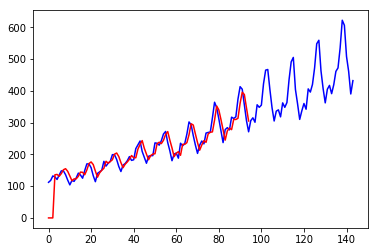

In [33]:
# Plot prediction results on train data
plt.plot(time_series_raw, "blue")

graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
graph_pred_train[nr_inp_time_steps:] = a2
plt.plot(graph_pred_train, "red")

plt.show()

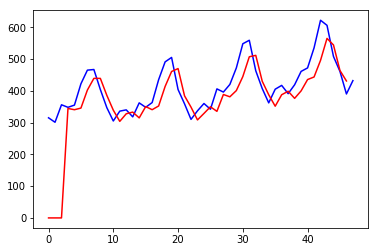

In [36]:
# Plot prediction results on test data
test_series_origscale = time_series_raw[train_size:]
plt.plot(test_series_origscale, "blue")

graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
graph_pred_test[nr_inp_time_steps:] = a4
plt.plot(graph_pred_test, "red")

plt.show()

## 11. Putting all code for experiments together

Now that we have seen how to load in the data, split it into training and testing data, prepare it as input for a Keras LSTM, build a LSTM model, how to train it and use it for time series prediction, we put all the code together in one code snippet in order to be able to conduct different experiments.

Now let us conduct a first experiment where we train the LSTM model 200 epochs instead of 100:

In [72]:
def do_lstm_experiment(exp_nr,
                       nr_inp_time_steps,
                       nr_out_time_steps,
                       nr_lstm_cells,
                       nr_train_epochs,
                       batch_size_to_use,
                       show_plots=False):
    
    # Fix random seed for making
    # sure, we always start with the same weights
    np.random.seed(123)
    
    print("\n", exp_nr, ". Experiment with:", sep='')
    print("\t nr_inp_time_steps=", nr_inp_time_steps)
    print("\t nr_out_time_steps=", nr_out_time_steps)
    print("\t nr_lstm_cells=", nr_lstm_cells)
    print("\t nr_train_epochs=", nr_train_epochs)
    print("\t batch_size_to_use=", batch_size_to_use)
        

    # 1.
    # We need to re-prepare the train and test data
    # depending on the number of input time steps
    # used and depending on how many time steps shall
    # be predicted
    trainX, trainY = to_sequence_data(train_series,
                                      nr_inp_time_steps,
                                      nr_out_time_steps)
    testX, testY = to_sequence_data(test_series,
                                    nr_inp_time_steps,
                                    nr_out_time_steps)


    # 2.
    # Reshape input to be [samples, time steps, features]
    # this is the shape of the input that is needed for
    # the Keras LSTM as input!
    trainX = np.reshape(trainX,(trainX.shape[0], nr_inp_time_steps, 1))
    testX  = np.reshape(testX, (testX.shape[0], nr_inp_time_steps, 1))


    # 3.
    # Build a Keras LSTM model and train it
    model = Sequential()
    model.add(LSTM(nr_lstm_cells, input_shape=(nr_inp_time_steps, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')    
    model.fit(trainX,
              trainY,
              epochs=nr_train_epochs,
              batch_size=batch_size_to_use,
              verbose=0)


    # 4.
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)


    # 5.
    # Rescale predictions and ground truth to original scale
    trainPredict_origscale = scaler.inverse_transform(trainPredict)
    trainY_origscale = scaler.inverse_transform(trainY)
    testPredict_origscale = scaler.inverse_transform(testPredict)
    testY_origscale = scaler.inverse_transform(testY)


    # 6.
    # Calculate prediction error on train data
    a1 = trainY_origscale[0]
    a2 = trainPredict_origscale[:,0]
    diff_train = a1-a2    
    train_error = np.average(np.abs(diff_train))
    
    # Calculate prediction error on test data
    a3 = testY_origscale[0]
    a4 = testPredict_origscale[:,0]
    diff_test = a3-a4    
    test_error = np.average(np.abs(diff_test))
    

    # 7.
    # If user wants, plot the predictions
    # compared to the ground truth data
    if show_plots:
        # Plot prediction results on train data
        plt.plot(time_series_raw, "blue")
        graph_pred_train = np.zeros(nr_inp_time_steps+len(a2))
        graph_pred_train[nr_inp_time_steps:] = a2
        plt.plot(graph_pred_train, "red")
        plt.show()
        # Plot prediction results on test data
        test_series_origscale = time_series_raw[train_size:]
        plt.plot(test_series_origscale, "blue")
        graph_pred_test = np.zeros(nr_inp_time_steps+len(a4))
        graph_pred_test[nr_inp_time_steps:] = a4
        plt.plot(graph_pred_test, "red")
        plt.show()
        
    # 8.
    # Show experiment results
    print("\t Avg train error: %.2f" % train_error)
    print("\t Avg test error: %.2f" % test_error)

## 12. Experiments

In [73]:
# The same experiments as above again
do_lstm_experiment(1, 3,1,4,100,8)

# More LSTM cells
do_lstm_experiment(2, 3,1,8,100,8)

# More LSTM cells and more training time
do_lstm_experiment(3, 3,1,8,300,8)

# More LSTM cells and even more training time
do_lstm_experiment(4, 3,1,8,600,8)

# Smaller batch size
do_lstm_experiment(5, 3,1,4,100,1)


1. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 100
	 batch_size_to_use= 8
	 Avg train error: 88.86
	 Avg test error: 64.38

2. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 8
	 nr_train_epochs= 100
	 batch_size_to_use= 8
	 Avg train error: 86.81
	 Avg test error: 58.88

3. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 8
	 nr_train_epochs= 300
	 batch_size_to_use= 8
	 Avg train error: 85.35
	 Avg test error: 54.69

4. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 8
	 nr_train_epochs= 600
	 batch_size_to_use= 8
	 Avg train error: 87.45
	 Avg test error: 61.31

5. Experiment with:
	 nr_inp_time_steps= 3
	 nr_out_time_steps= 1
	 nr_lstm_cells= 4
	 nr_train_epochs= 100
	 batch_size_to_use= 1
	 Avg train error: 84.93
	 Avg test error: 56.45
